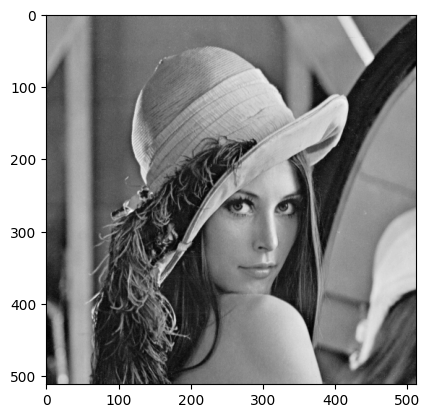

In [7]:


#第一题   ----   实现灰度化和二值化
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim

def fucgray(img):
    height,width=img.shape[:2]
    gray_img=np.zeros([height,width],img.dtype)
    for i in range(height):
        for j in range(width):
            gray=img[i,j]   #是一个一行三列的数组
            gray_color=int(gray[0]*0.11+gray[1]*0.59+gray[2]*0.3)
            gray_img[i,j]=gray_color
            
           # print(gray_img[i,j])
            
    return gray_img
            
    
    
img = cv2.imread("lenna.png")   #img是数组
gray_img= fucgray(img)
#print(gray_img)
plt.imshow(gray_img,cmap='gray')


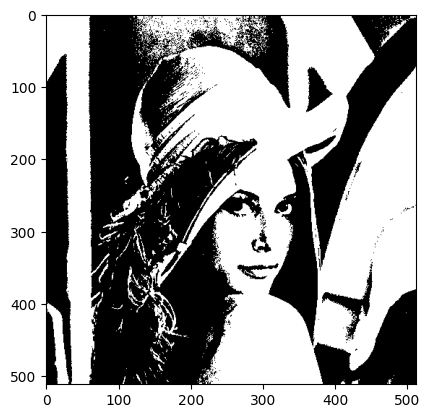

In [8]:

#     1.实现二值化


def fuc2(img):
    height,width=img.shape
    for i in range(height):
        for j in range(width):
            #print(img[i,j])
            img[i,j]=img[i,j]/255+0.5
            #print(img[i,j])
            if(img[i,j] >= 0.5 ):
                img[i,j]=1
            else:
                img[i,j]=0
            
    return img
            
  #img是数组
#print(gray_img)
plt.imshow(fuc2(gray_img),cmap="gray")


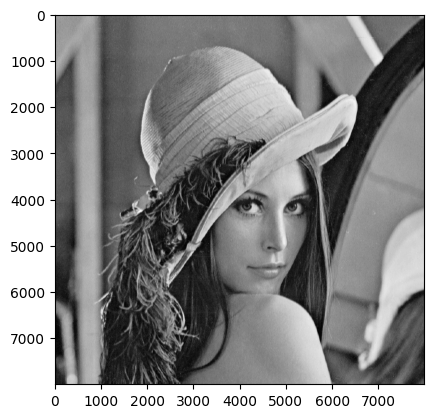

In [96]:

#   第三题----实现最邻近插值
def nearestinter(img):
    
    height,width = img.shape
    imgnew=np.zeros([8000,8000],img.dtype)
    for i in range(8000):
        for j in range(8000):
            src_x=int(i*(width/8000))
            src_y=int(j*(height/8000))
            imgnew[i,j]=img[src_x,src_y]
            
    return imgnew
#plt.imshow(gray_img,cmap="gray")
plt.imshow(nearestinter(gray_img),cmap="gray")
            
            

In [ ]:
#第四题---证明双线性插值中心重合
#设原图为x*y,目标图为m*n,设参数为k
#源图的中心点是((x-1)/2,(y-1)/2)
#目标图的中心点是((m-1)/2,(n-1)/2)
#为了满足中心对称
#(x-1)/2+k=((m-1)/2+k)*(x/m)
#  k-1/2      =-x/2m+kx/m
#   k(1-x/m)=1/2-x/2m
#   k=1/2


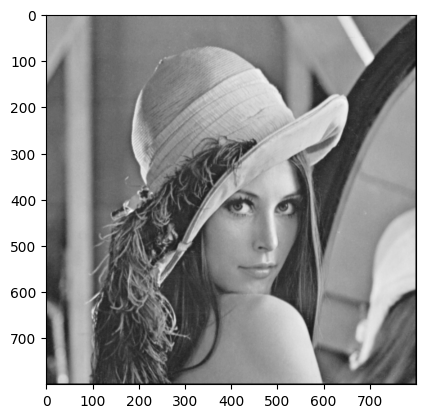

In [6]:
#实现双线性插值
def bilinear(img):
    
    height,width=img.shape
    bilin_img=np.zeros([800,800],img.dtype)
    for j in range(800):
        for i in range(800):  #先宽后高
            src_x=(i+0.5)*(width/800)-0.5
            src_y=(j+0.5)*(height/800)-0.5
            src_x0 = int(np.floor(src_x))
            src_x1 = min(src_x0 + 1 ,width - 1)
            src_y0 = int(np.floor(src_y))
            src_y1 = min(src_y0 + 1, height - 1)
 
                # calculate the interpolation
            temp0 = (src_x1 - src_x) * img[src_x0,src_y0] + (src_x - src_x0) * img[src_x1,src_y0]
            temp1 = (src_x1 - src_x) * img[src_x0,src_y1] + (src_x - src_x0) * img[src_x1,src_y1]
            bilin_img[i,j] = int((src_y1 - src_y) * temp0 + (src_y - src_y0) * temp1)
 
            #bilin_img[i,j]=img[src_x,src_y]
    return bilin_img

plt.imshow(bilinear(gray_img),cmap="gray")

            